# EPIC Institute of Technology 
## Data Science. Homework 4

## Dear students, welcome to your data science homework assignment! Below are the tasks you need to complete. Please follow the instructions and fill in the code cells provided. Feel free do add more cells if needed.

## Task 1: Exploratory Data Analysis (EDA)

### 1.1 Target Distribution Analysis
- Load the dataset.
- Analyze the distribution of the target variable.

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.svm import SVC
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abdelrehman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/abdelrehman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/abdelrehman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
df = pd.read_csv('train.csv')
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [12]:
df['sentiment'].value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

In [13]:
df = df.dropna(subset=['text'])

### 1.2 Wordclouds for Each Target
- Create wordclouds for each target.

positive


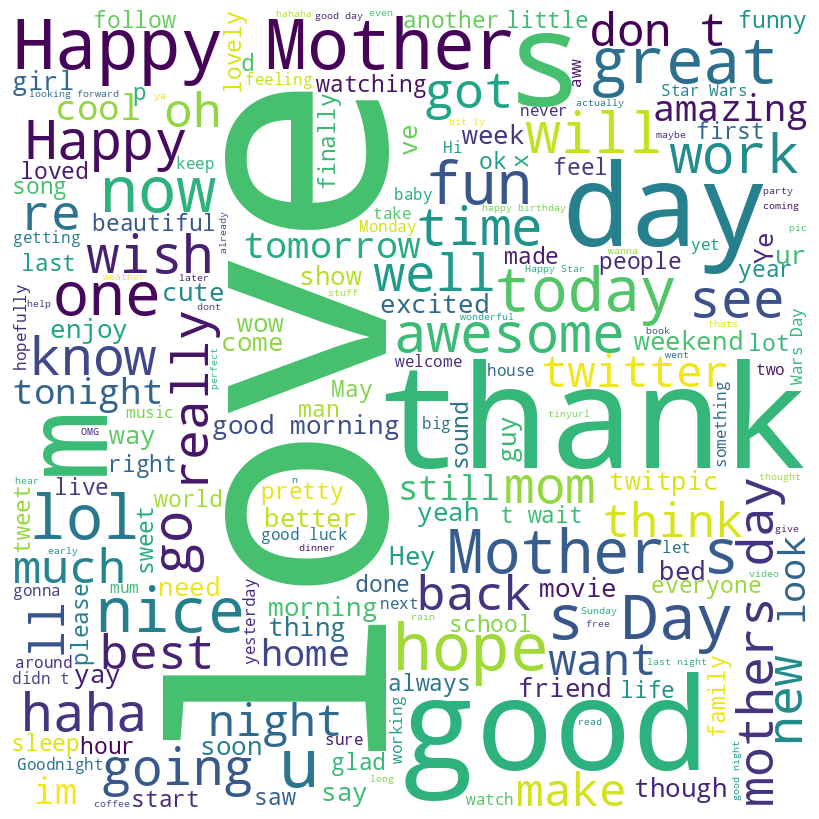

neutral


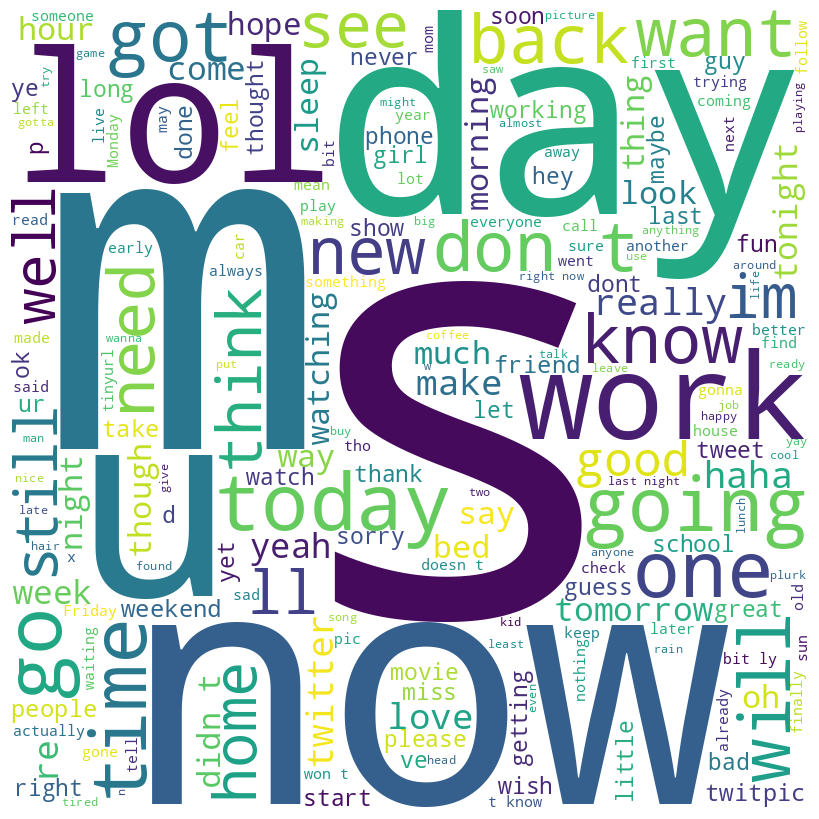

negative


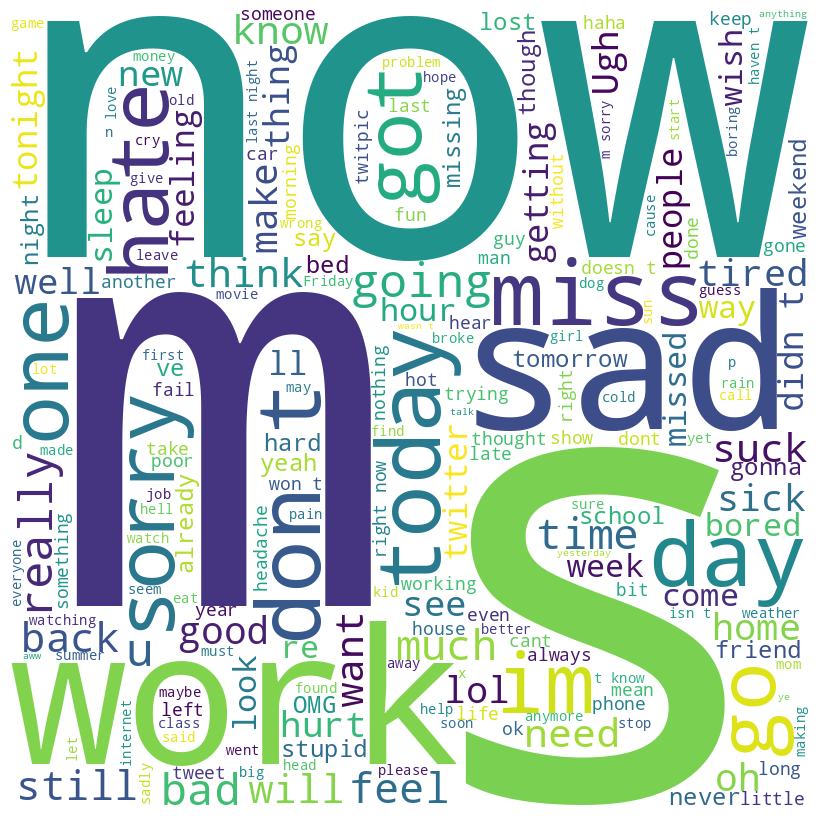

In [14]:
targets = ['positive', 'neutral', 'negative']
for target in targets:
    text = ' '.join(df[df['sentiment'] == target]['text'])

    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

    print(target)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


### 1.3 Analysis of Most Common Words for Each Target
- Analyze and visualize the most common words for each target.

In [15]:
# Your code here

### 1.4 Other Plots (Optional)
- Generate any additional plots that you think might provide valuable insights into the data.

In [16]:
# Your code here

## Task 2: Feature Engineering

### 2.1 Text Preprocessing
- Remove punctuation, default stop words, and stop words not covered by default.

In [17]:
# Your code here 
def preprocess_text(text):
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    filtered_tokens_no_punct = [word for word in filtered_tokens if word.isalnum()]
    
    # Perform additional preprocessing steps if needed (e.g., stemming, lemmatization, etc.)
    # Example: Lemmatization using WordNetLemmatizer
    lemmatizer = nltk.WordNetLemmatizer()
    preprocessed_text = ' '.join([lemmatizer.lemmatize(word) for word in filtered_tokens_no_punct])
    
    return preprocessed_text

In [18]:
# Your code here
df['text'].apply(preprocess_text)

0                                          responded going
1                                  Sooo SAD miss San Diego
2                                             bos bullying
3                                    interview leave alone
4                          Sons put release already bought
                               ...                        
27476    wish could come see u Denver husband lost job ...
27477    wondered rake client made clear force devs lea...
27478    Yay good Enjoy break probably need hectic week...
27479                                                worth
27480                     flirting going ATG smile Yay hug
Name: text, Length: 27480, dtype: object

### 2.2 Generate Features
- Choose one of the following methods: TF IDF, Counter, or binary feature for each word (whether you have such a word in your text).
- Generate features and update your dataset.

In [19]:
text_data = df['text']
labels = df['sentiment']

# Create TF-IDF features from the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = tfidf_vectorizer.fit_transform(text_data)
y = labels

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train, y_train

(<21984x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 195598 stored elements in Compressed Sparse Row format>,
 21209    positive
 18265    positive
 9684      neutral
 9689     positive
 22728     neutral
            ...   
 21576     neutral
 5391      neutral
 861       neutral
 15796    positive
 23655    positive
 Name: sentiment, Length: 21984, dtype: object)

## Task 3: Model Fitting

### 3.1 Fitting NaiveBayes
- Fit a Naive Bayes model to the data.

In [22]:
# Your code here
nb = MultinomialNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

test_df = pd.read_csv('test.csv')
X = tfidf_vectorizer.transform(test_df['text'])

prediction = nb.predict(X)

Accuracy: 0.6381004366812227


### 3.2 Fitting SVC
- Fit a Support Vector Classifier (SVC) to the data.

In [23]:
# Your code here
svc = SVC(kernel= 'linear', random_state=1, C=0.1)

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

test_df = pd.read_csv('test.csv')
X = tfidf_vectorizer.transform(test_df['text'])

prediction = svc.predict(X)

Accuracy: 0.6359170305676856


### 3.3 Fitting Decision Tree
- Fit a Decision Tree model to the data.

In [24]:
# Your code here
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

test_df = pd.read_csv('test.csv')
X = tfidf_vectorizer.transform(test_df['text'])

prediction = clf.predict(X)

Accuracy: 0.4827147016011645


### 3.4 Model Comparison and Hyperparameter Tuning
- Compare the performance of the three models.
- Perform cross-validation and grid search to find the best hyperparameters for each model.

In [25]:
# Your code here

## Task 4: Kaggle Submission

### Submit your predictions to Kaggle and compete with other students!
Don't forget to leave a link to your Kaggle profile so that we can identify your work.
<br>
GL & HF 😉

### Link to your Kaggle profile here
https://www.kaggle.com/abdelrehmanmamdouh